# Subroutine 1
Generate points based on the labels (taken as an input from the GUI)
structure of the point:
    (t0, vel, flag (1=hyperbolic, 0=linear), label)

In [1]:
import random
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline


def points_gen(nDA,nR,nCN):
    # The function generates random values of t0 - velocity pairs
    # based on number of requested waves:
    # nDA - number of direct waves (linear moveout, label 'D')
    # nR - number of reflections (hyperbolic moveout, label 'R')
    # nCN - number of coherent noise events (linear moveout, label 'N')
    # outputs (nDA+nR+nCN) * (4) list
    # each point in the list has the following structure
    # [t0 (intercept time), velocity, flag(1=hyperbolic, 0=linear), label(see above))]
    
    
    # direct arrival
    direct = []
    n = 1
    while (n <= nDA):
        direct.append([0,random.uniform(.5,1.5),0,'D'])
        n = n+1
    
    n = 1
    reflected = []
    while (n <= nR):
        reflected.append([random.uniform(0,4),random.uniform(1.5,5),1,'R'])
        n = n+1
        
    n = 1
    noise = []
    while (n <= nCN):
        noise.append([random.uniform(-2,2),random.uniform(-3,3),0,'N'])
        n = n+1
        
    events = direct + reflected + noise
    return events

In [2]:
def points_plot(events):
    x = [x/1000 for x in range(0,2000,25)]
    
    fig, ax = plt.subplots()
    
    # plot waves
    for i in events:
        if i[3] == 'D':
            y = [offset/i[1] for offset in x]
            ax.plot(x,y,'r')
        if i[3] == 'N':
            ax.plot(x,[i[0]+offset/i[1] for offset in x],'b')
        if i[3] == 'R':
            ax.plot(x,[np.sqrt(i[0]**2 + offset**2 / i[1]**2) for offset in x],'g')
    
    plt.ylabel('Time, s')
    plt.xlabel('Offset, km')
    ax.set_xlim([0,2])
    ax.set_ylim([0,4])
    ax.invert_yaxis()
    ax.set_aspect(1)
    return ax

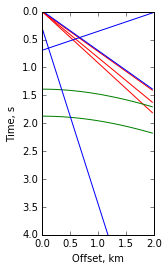

In [3]:
events=points_gen(3,2,3)
ax = points_plot(events)
plt.show(ax)

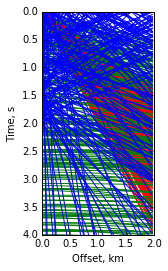

In [4]:
events2=points_gen(300,200,300)
ax2 = points_plot(events2)
plt.show(ax2)

In [5]:
events2

[[0, 1.0148865772731872, 0, 'D'],
 [0, 1.0941856196586313, 0, 'D'],
 [0, 0.6455108483980122, 0, 'D'],
 [0, 0.668236699970075, 0, 'D'],
 [0, 0.9032976253474868, 0, 'D'],
 [0, 0.8700109096905091, 0, 'D'],
 [0, 0.5637730488821617, 0, 'D'],
 [0, 1.3929304664612099, 0, 'D'],
 [0, 0.8335948540957102, 0, 'D'],
 [0, 0.5590921903147255, 0, 'D'],
 [0, 1.009722548874234, 0, 'D'],
 [0, 0.7957340879502605, 0, 'D'],
 [0, 0.9361297118730292, 0, 'D'],
 [0, 1.349431447632905, 0, 'D'],
 [0, 0.6057628060794632, 0, 'D'],
 [0, 0.6522102613550002, 0, 'D'],
 [0, 0.7500281982103304, 0, 'D'],
 [0, 0.8702503783612718, 0, 'D'],
 [0, 1.1715053167392164, 0, 'D'],
 [0, 1.4793938081102875, 0, 'D'],
 [0, 1.3618457516120415, 0, 'D'],
 [0, 0.6284106594653927, 0, 'D'],
 [0, 0.5911978312274001, 0, 'D'],
 [0, 1.2264699351174424, 0, 'D'],
 [0, 0.7618469894998245, 0, 'D'],
 [0, 1.2671895550556584, 0, 'D'],
 [0, 1.2232705989856503, 0, 'D'],
 [0, 1.4645833676606368, 0, 'D'],
 [0, 1.2428457981071268, 0, 'D'],
 [0, 1.0406395082

In [6]:
events

[[0, 1.4021220372768726, 0, 'D'],
 [0, 1.089888341900227, 0, 'D'],
 [0, 1.2154968236024186, 0, 'D'],
 [1.3899450625558138, 1.9959882644703277, 1, 'R'],
 [1.8739260385574292, 1.7799720602690559, 1, 'R'],
 [-0.013128430309805594, 1.4108238470333383, 0, 'N'],
 [0.2995777143677967, 0.31825293098027885, 0, 'N'],
 [0.6925695933148575, -2.953899439683635, 0, 'N']]

In [7]:
x = [x/1000 for x in range(0,2000,25)]
ax.plot(x,[offset/.5 for offset in x],'r')

In [8]:
plt.show()

In [9]:
def t_linear(x, v, t):
    # return a linear event (direct or coherent noise)
    return t + x/v

def t_reflected(x,v,t):
    return np.sqrt(t**2 + x**2 / v**2)

In [10]:
import random
import numpy as np
import matplotlib.pylab as plt


def points_gen_dict(x,nDA=1,nR=1,nCN=1):
    # The function generates random values of t0 - velocity pairs
    # based on number of requested waves:
    # nDA - number of direct waves (linear moveout, label 'D')
    # nR - number of reflections (hyperbolic moveout, label 'R')
    # nCN - number of coherent noise events (linear moveout, label 'N')
    # outputs (nDA+nR+nCN) * (4) list
    # each point in the list has the following structure
    # [t0 (intercept time), velocity, flag(1=hyperbolic, 0=linear), label(see above))]
    # outputs dictionary
    
    events={}
    
    # direct arrival
    events['direct'], events['reflected'], events['coherent noise'] = [],[],[]
    
    for n in range(nDA):
        events['direct'].append(t_linear(x,random.uniform(.5,1.5),0))
        
    for n in range(nR):
        events['reflected'].append(t_reflected(x,random.uniform(0,4),random.uniform(1.5,5)))
        
    for n in range(nCN):
        events['coherent noise'].append(t_linear(x,random.uniform(-2,2),random.uniform(-3,3)))
        
    return events

In [11]:
dx = .025
x = np.arange(0,2+dx,dx)

events=points_gen_dict(x,2,3,4)

In [12]:
events

{'coherent noise': [array([ 0.34170547,  0.37118138,  0.40065728,  0.43013318,  0.45960909,
          0.48908499,  0.51856089,  0.54803679,  0.5775127 ,  0.6069886 ,
          0.6364645 ,  0.6659404 ,  0.69541631,  0.72489221,  0.75436811,
          0.78384401,  0.81331992,  0.84279582,  0.87227172,  0.90174763,
          0.93122353,  0.96069943,  0.99017533,  1.01965124,  1.04912714,
          1.07860304,  1.10807894,  1.13755485,  1.16703075,  1.19650665,
          1.22598255,  1.25545846,  1.28493436,  1.31441026,  1.34388617,
          1.37336207,  1.40283797,  1.43231387,  1.46178978,  1.49126568,
          1.52074158,  1.55021748,  1.57969339,  1.60916929,  1.63864519,
          1.6681211 ,  1.697597  ,  1.7270729 ,  1.7565488 ,  1.78602471,
          1.81550061,  1.84497651,  1.87445241,  1.90392832,  1.93340422,
          1.96288012,  1.99235602,  2.02183193,  2.05130783,  2.08078373,
          2.11025964,  2.13973554,  2.16921144,  2.19868734,  2.22816325,
          2.25763915

(4, 0)

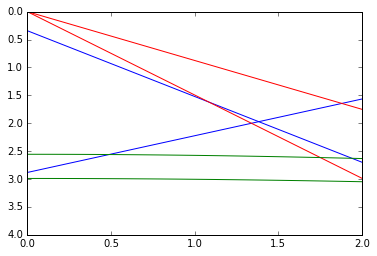

In [13]:
colors = {'direct': 'red', 'reflected': 'green', 'coherent noise': 'blue'}

for k, values in events.items():
    for array in values:
        plt.plot(x,array,c = colors[k])
plt.ylim(4,0)

(0.56666666666666665, -0.10000000000000001)

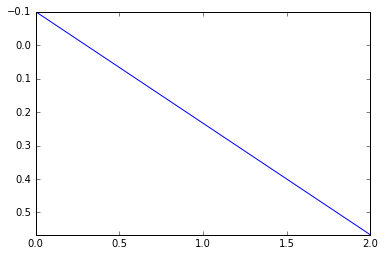

In [14]:
dt = .025
x = np.arange(0,2+dt,dt)

t = t_linear(x,3,-0.1)

plt.plot(x,t)
plt.ylim(np.amax(t),np.amin(t))

In [15]:
for key in points_gen_dict(2,3,4):
    plt.plot(x,[offset/i[1] for offset in x])
    

NameError: name 'i' is not defined